In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
rng = np.random.default_rng()

In [2]:
sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)
sig_noise = sig + rng.standard_normal(len(sig))
corr = signal.correlate(sig_noise, np.ones(128), mode='same') / 128

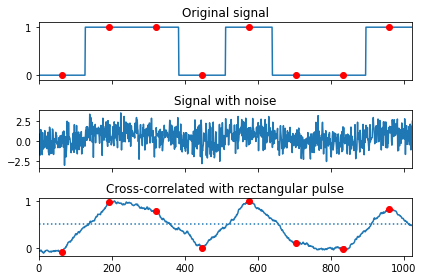

In [3]:
clock = np.arange(64, len(sig), 128)
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.plot(clock, sig[clock], 'ro')
ax_orig.set_title('Original signal')
ax_noise.plot(sig_noise)
ax_noise.set_title('Signal with noise')
ax_corr.plot(corr)
ax_corr.plot(clock, corr[clock], 'ro')
ax_corr.axhline(0.5, ls=':')
ax_corr.set_title('Cross-correlated with rectangular pulse')
ax_orig.margins(0, 0.1)
fig.tight_layout()
plt.show()

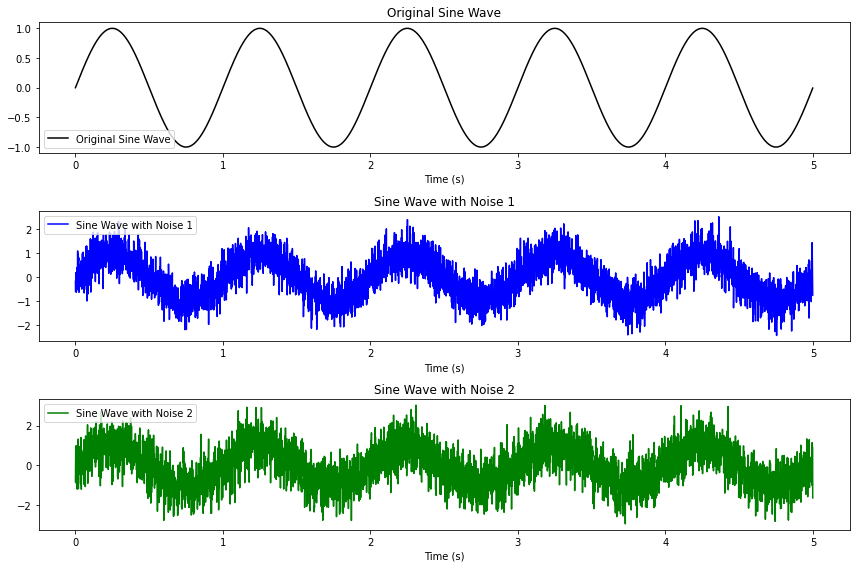

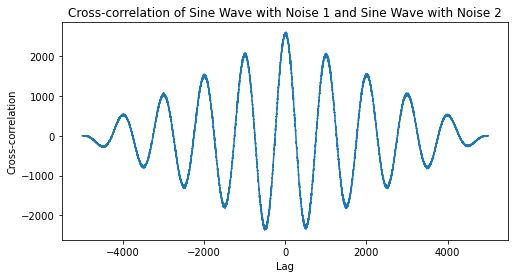

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

# Function to generate a sine wave with noise
def generate_noisy_sine_wave(frequency, duration, sampling_rate, noise_level):
    t = np.arange(0, duration, 1/sampling_rate)
    sine_wave = np.sin(2 * np.pi * frequency * t)
    noise = noise_level * np.random.normal(size=len(t))
    noisy_sine_wave = sine_wave + noise
    return t, noisy_sine_wave

# Parameters
frequency = 1.0  # Frequency of the sine wave
duration = 5.0   # Duration of the signal in seconds
sampling_rate = 1000  # Sampling rate in Hz
noise_level_1 = 0.5  # Level of noise for the first signal
noise_level_2 = 0.7  # Level of noise for the second signal

# Generate the noisy sine waves
t, signal_with_noise_1 = generate_noisy_sine_wave(frequency, duration, sampling_rate, noise_level_1)
_, signal_with_noise_2 = generate_noisy_sine_wave(frequency, duration, sampling_rate, noise_level_2)

# Plot the original sine wave and the sine waves with different noise
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(t, np.sin(2 * np.pi * frequency * t), label='Original Sine Wave', color='black')
plt.title('Original Sine Wave')
plt.xlabel('Time (s)')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, signal_with_noise_1, label='Sine Wave with Noise 1', color='blue')
plt.title('Sine Wave with Noise 1')
plt.xlabel('Time (s)')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, signal_with_noise_2, label='Sine Wave with Noise 2', color='green')
plt.title('Sine Wave with Noise 2')
plt.xlabel('Time (s)')
plt.legend()

plt.tight_layout()
plt.show()

# Cross-correlate the signals with different noise
cross_correlation = correlate(signal_with_noise_1, signal_with_noise_2, mode='full')

# Plot the cross-correlation result
plt.figure(figsize=(8, 4))
plt.plot(np.arange(-len(signal_with_noise_1)+1, len(signal_with_noise_1)), cross_correlation)
plt.title('Cross-correlation of Sine Wave with Noise 1 and Sine Wave with Noise 2')
plt.xlabel('Lag')
plt.ylabel('Cross-correlation')
plt.show()

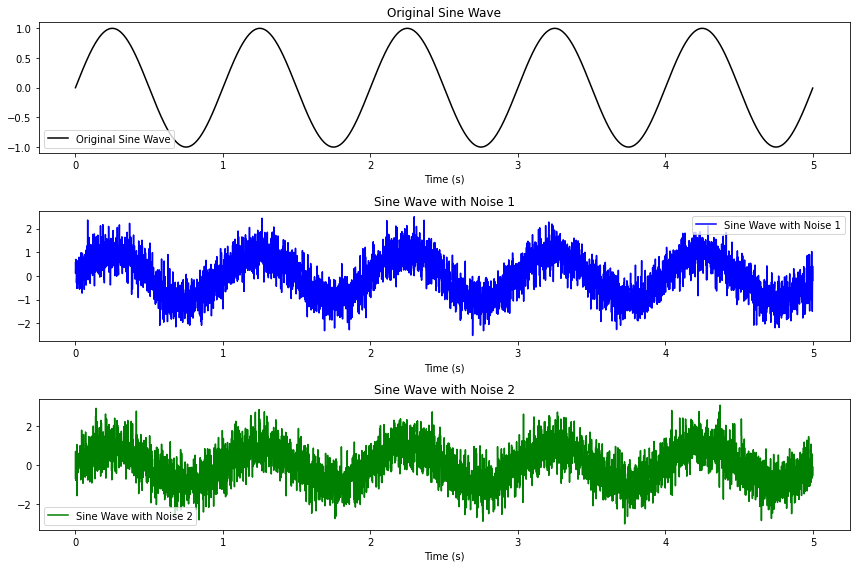

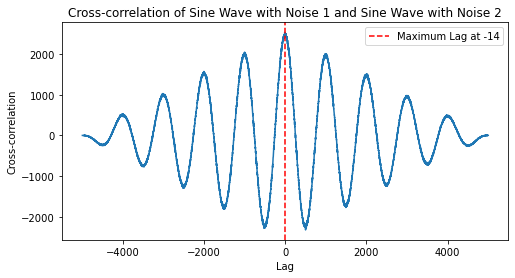

The lag where the signals match best is: -14 samples


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate

# Function to generate a sine wave with noise
def generate_noisy_sine_wave(frequency, duration, sampling_rate, noise_level):
    t = np.arange(0, duration, 1/sampling_rate)
    sine_wave = np.sin(2 * np.pi * frequency * t)
    noise = noise_level * np.random.normal(size=len(t))
    noisy_sine_wave = sine_wave + noise
    return t, noisy_sine_wave

# Parameters
frequency = 1.0  # Frequency of the sine wave
duration = 5.0   # Duration of the signal in seconds
sampling_rate = 1000  # Sampling rate in Hz
noise_level_1 = 0.5  # Level of noise for the first signal
noise_level_2 = 0.7  # Level of noise for the second signal

# Generate the noisy sine waves
t, signal_with_noise_1 = generate_noisy_sine_wave(frequency, duration, sampling_rate, noise_level_1)
_, signal_with_noise_2 = generate_noisy_sine_wave(frequency, duration, sampling_rate, noise_level_2)

# Plot the original sine wave and the sine waves with different noise
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(t, np.sin(2 * np.pi * frequency * t), label='Original Sine Wave', color='black')
plt.title('Original Sine Wave')
plt.xlabel('Time (s)')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, signal_with_noise_1, label='Sine Wave with Noise 1', color='blue')
plt.title('Sine Wave with Noise 1')
plt.xlabel('Time (s)')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, signal_with_noise_2, label='Sine Wave with Noise 2', color='green')
plt.title('Sine Wave with Noise 2')
plt.xlabel('Time (s)')
plt.legend()

plt.tight_layout()
plt.show()

# Cross-correlate the signals with different noise
cross_correlation = correlate(signal_with_noise_1, signal_with_noise_2, mode='full')

# Find the lag where cross-correlation is maximum
lag = np.argmax(cross_correlation) - len(signal_with_noise_1) + 1

# Plot the cross-correlation result
plt.figure(figsize=(8, 4))
plt.plot(np.arange(-len(signal_with_noise_1)+1, len(signal_with_noise_1)), cross_correlation)
plt.title('Cross-correlation of Sine Wave with Noise 1 and Sine Wave with Noise 2')
plt.xlabel('Lag')
plt.ylabel('Cross-correlation')

# Highlight the lag where cross-correlation is maximum
plt.axvline(x=lag, color='red', linestyle='--', label=f'Maximum Lag at {lag}')
plt.legend()

plt.show()

print(f"The lag where the signals match best is: {lag} samples")


In [6]:
# Now load in waveforms
waveforms = np.load("exported_waveforms.npy", allow_pickle=True)

In [7]:
waveforms[0]["samples"]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [8]:
#from scipy import fft
#C = fft.ifft(data_list[keys_list[0]][0])

#fft 2 samples
#complec conjugate of 1
#multiply
#inverse fft output

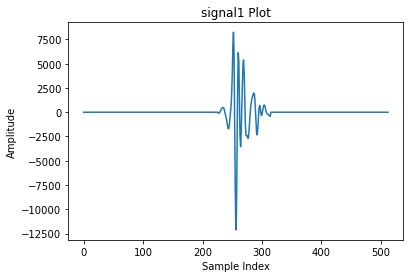

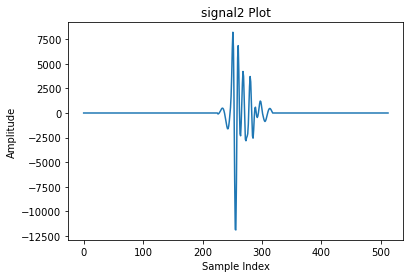

In [9]:

# Extracting the samples from the first waveform
signal1 = waveforms[0]["samples"]

# Plotting the waveform
plt.plot(signal1)
plt.title('signal1 Plot')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()

# Extracting the samples from the first waveform
signal2 = waveforms[1]["samples"]

# Plotting the waveform
plt.plot(signal2)
plt.title('signal2 Plot')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()


In [10]:
from scipy import fft, ifft

def correlate(a,b):
    ffta = fft.fft(a)
    fftb = fft.fft(b)
    compfftb = np.conj(fftb)
    product = compfftb*ffta
    return fft.ifft(product)
    

In [11]:
crosscorrelation = correlate(signal1, signal2)
rolled_cc = np.roll(crosscorrelation, shift=250)

C:\Users\archi\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


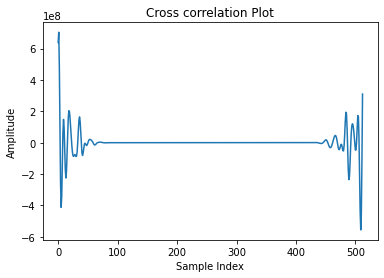

In [12]:
plt.plot(crosscorrelation)
plt.title('Cross correlation Plot')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()

C:\Users\archi\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


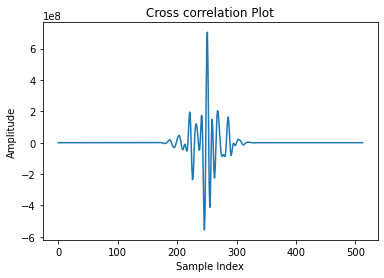

In [13]:
plt.plot(rolled_cc)
plt.title('Cross correlation Plot')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()

In [14]:
np.argmax(rolled_cc)

251

In [15]:
sinetest = correlate(signal_with_noise_2, signal_with_noise_1)
rolledsinetest = np.roll(sinetest, shift=2500)

C:\Users\archi\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


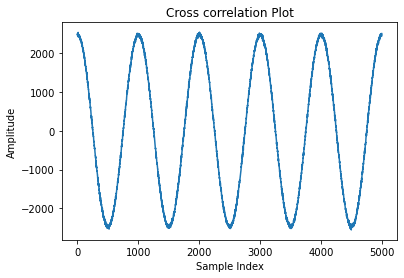

In [16]:
plt.plot(sinetest)
plt.title('Cross correlation Plot')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()

C:\Users\archi\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


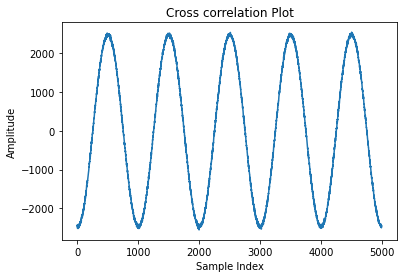

In [17]:
plt.plot(rolledsinetest)
plt.title('Cross correlation Plot')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()

In [18]:
np.argmax(rolledsinetest)

4507

C:\Users\archi\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


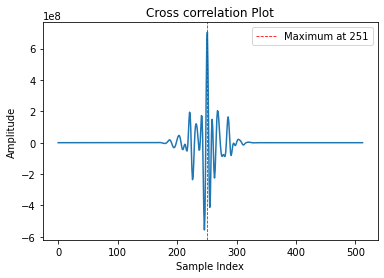

In [20]:
plt.plot(rolled_cc)
plt.title('Cross correlation Plot')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')

# Add a dotted red line at the position of the argmax
max_index = np.argmax(rolled_cc)
plt.axvline(x=max_index, color='red', linestyle='--', linewidth=0.8, label=f'Maximum at {max_index}')

# Show the plot
plt.legend()
plt.show()

In [33]:
#determining the effect of random noise on the cross correlation


signal2 = waveforms[1]["samples"]

# Parameters
new_noise_amplitude = 5000  # Adjust the amplitude of the additional noise

# Add more noise to signal2
additional_noise = new_noise_amplitude * np.random.normal(size=len(signal2))
signal2noise = signal2 + additional_noise

noiseCC = correlate(signal1, signal2noise)
rolled_noiseCC = np.roll(noiseCC, shift = 250)

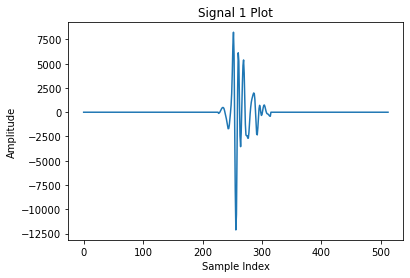

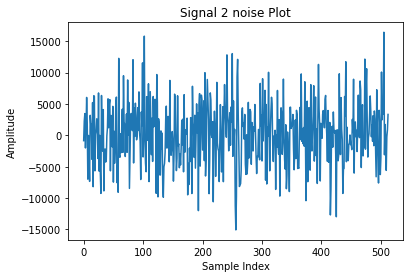

C:\Users\archi\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


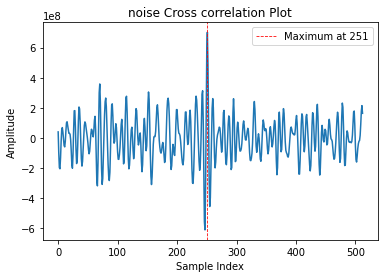

In [34]:
plt.plot(signal1)
plt.title('Signal 1 Plot')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()

plt.plot(signal2noise)
plt.title('Signal 2 noise Plot')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()

plt.plot(rolled_noiseCC)
plt.title('noise Cross correlation Plot')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
max_index = np.argmax(rolled_noiseCC)
plt.axvline(x=max_index, color='red', linestyle='--', linewidth=0.8, label=f'Maximum at {max_index}')
plt.legend()
plt.show()

#appears to give same maximum CC position regardless of amplitude of the noise

C:\Users\archi\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


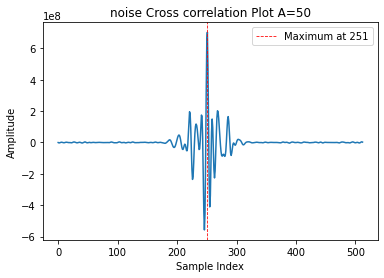

C:\Users\archi\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


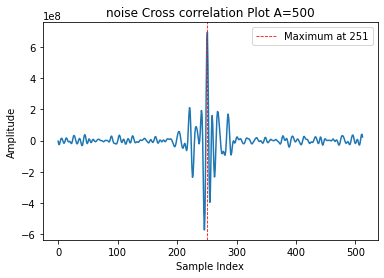

C:\Users\archi\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


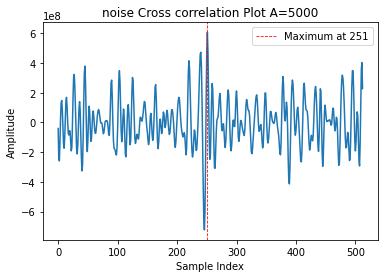

C:\Users\archi\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


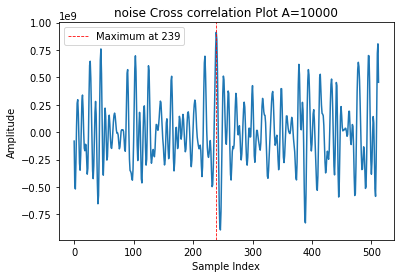

In [38]:
#changing the amount of noise added to signal 2 and seeing the effect on cross correlation
additionalnoise = np.random.normal(size=len(signal2))

signal2noise50 = signal2 + additionalnoise*50
signal2noise500 = signal2 + additionalnoise*500
signal2noise5000 = signal2 + additionalnoise*5000
signal2noise10000 = signal2 + additionalnoise*10000

noiseCC50 = correlate(signal1, signal2noise50)
rolled_noiseCC50 = np.roll(noiseCC50, shift = 250)

noiseCC500 = correlate(signal1, signal2noise500)
rolled_noiseCC500 = np.roll(noiseCC500, shift = 250)

noiseCC5000 = correlate(signal1, signal2noise5000)
rolled_noiseCC5000 = np.roll(noiseCC5000, shift = 250)

noiseCC10000 = correlate(signal1, signal2noise10000)
rolled_noiseCC10000 = np.roll(noiseCC10000, shift = 250)

plt.plot(rolled_noiseCC50)
plt.title('noise Cross correlation Plot A=50')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
max_index = np.argmax(rolled_noiseCC50)
plt.axvline(x=max_index, color='red', linestyle='--', linewidth=0.8, label=f'Maximum at {max_index}')
plt.legend()
plt.show()

plt.plot(rolled_noiseCC500)
plt.title('noise Cross correlation Plot A=500')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
max_index = np.argmax(rolled_noiseCC500)
plt.axvline(x=max_index, color='red', linestyle='--', linewidth=0.8, label=f'Maximum at {max_index}')
plt.legend()
plt.show()

plt.plot(rolled_noiseCC5000)
plt.title('noise Cross correlation Plot A=5000')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
max_index = np.argmax(rolled_noiseCC5000)
plt.axvline(x=max_index, color='red', linestyle='--', linewidth=0.8, label=f'Maximum at {max_index}')
plt.legend()
plt.show()

plt.plot(rolled_noiseCC10000)
plt.title('noise Cross correlation Plot A=10000')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
max_index = np.argmax(rolled_noiseCC10000)
plt.axvline(x=max_index, color='red', linestyle='--', linewidth=0.8, label=f'Maximum at {max_index}')
plt.legend()
plt.show()

# at very large noise e.g. A = 10000 the maximum cross correlation point is skewed